In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

/home/poonam/.local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
label = ['driving_license','social_security','others']
img_size = 224
def get_data(data_dir):
    """
    data directory where all class will have folders and all the images will be in that directory
    """
    data = [] 
    for each_label in label: 
        #print(each_label)
        path = os.path.join(data_dir, each_label)
        #print(path)
        class_num = label.index(each_label)
        for img in os.listdir(path):
            try:
                #convert BGR to RGB format
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] 
                # Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_data('./Training data/')

/home/poonam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


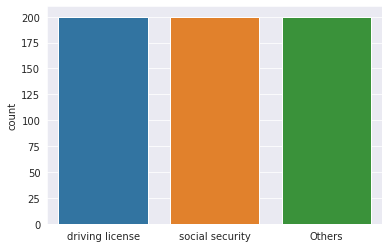

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("driving license")
    elif(i[1]==1):
        l.append("social security")
    else:
        l.append("Others")
sns.set_style('darkgrid')
sns.countplot(l)

In [8]:
## make numpy array of xtrain and y train,normalize it,and reshape to 224*224

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [9]:
## Image data generator with given parameters 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [10]:
### adding sequential model ,add a bunch of conv,maxpool,dropout ,flatten it and then eventually add a dense of 3 for all 3 classes.

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [11]:
## compilation of model with adam optimizer of 0.000001
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [12]:
## fit for 200 epochs and train

history = model.fit(x_train,y_train,epochs = 200)


Epoch 1/200
19/19 [==============================] - 39s 2s/step - loss: 1.1004 - accuracy: 0.3283
Epoch 2/200
19/19 [==============================] - 38s 2s/step - loss: 1.0982 - accuracy: 0.3400
Epoch 3/200
19/19 [==============================] - 15s 764ms/step - loss: 1.0984 - accuracy: 0.3517
Epoch 4/200
19/19 [==============================] - 12s 642ms/step - loss: 1.0978 - accuracy: 0.3600
Epoch 5/200
19/19 [==============================] - 12s 646ms/step - loss: 1.0985 - accuracy: 0.3300
Epoch 6/200
19/19 [==============================] - 12s 651ms/step - loss: 1.0970 - accuracy: 0.3583
Epoch 7/200
19/19 [==============================] - 13s 662ms/step - loss: 1.0991 - accuracy: 0.3350
Epoch 8/200
19/19 [==============================] - 13s 694ms/step - loss: 1.0964 - accuracy: 0.3817
Epoch 9/200
19/19 [==============================] - 13s 665ms/step - loss: 1.0964 - accuracy: 0.3817
Epoch 10/200
19/19 [==============================] - 12s 655ms/step - loss: 1.0965 - ac

In [13]:

# inference on xtrain,to see accuracy metrics
predictions = model.predict_classes(x_train)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_train, predictions, target_names = ['driving license (Class 0)','pan card (Class 1)','Others (Class 2)']))

W0818 21:57:47.380365 140298920219008 deprecation.py:323] From <ipython-input-13-1e233bf338d4>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


                           precision    recall  f1-score   support

driving license (Class 0)       0.82      0.86      0.84       200
       pan card (Class 1)       0.89      0.84      0.86       200
         Others (Class 2)       0.79      0.79      0.79       200

                micro avg       0.83      0.83      0.83       600
                macro avg       0.83      0.83      0.83       600
             weighted avg       0.83      0.83      0.83       600



In [14]:
model.save('model.h5')